In [55]:
import os
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
#sns.set(style="darkgrid")
from keras.models import load_model

In [2]:
TIMESTEPS = 1000
MIN_FAULT_DURATION = 12

In [3]:
df = pd.read_excel("time_series_all.xlsx")

In [4]:
df

,Feeder,Measurand,0,1,2,3,4,5,6,7,...,14490,14491,14492,14493,14494,14495,14496,14497,14498,14499
0,0,KV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B-4 S.J. ENCL.,AMPs,59.279,59.279,59.279,59.279,55.2146,55.2146,55.2146,55.2146,...,40.7447,40.7447,40.7447,50.2752,50.2752,50.2752,50.2752,62.5414,62.5414,62.5414
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981392,-0.981392,-0.981392,-0.981995,-0.981995,-0.981995,-0.981995,...,-0.964221,-0.964221,-0.964221,-0.973871,-0.973871,-0.973871,-0.973871,-0.98305,-0.98305,-0.98305
3,PANKHA RD CKT-2,AMPs,84.2096,84.2096,84.2096,84.2096,71.1225,71.1225,71.1225,71.1225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PANKHA RD CKT-2,KV,68.7123,68.7123,68.7123,68.7123,68.7763,68.7763,68.7763,68.7763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PANKHA RD CKT-2,PF,-0.993832,-0.993832,-0.993832,-0.993832,-0.994503,-0.994503,-0.994503,-0.994503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IGNOU S/S -3(Feeder 1),AMPs,50.6842,50.6842,50.6842,50.6842,47.0453,47.0453,47.0453,47.0453,...,33.5321,33.5321,33.5321,38.4531,38.4531,38.4531,38.4531,47.1678,47.1678,47.1678
7,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996355,-0.996355,-0.996355,-0.996485,-0.996485,-0.996485,-0.996485,...,-0.997994,-0.997994,-0.997994,-0.998952,-0.998952,-0.998952,-0.998952,-0.998727,-0.998727,-0.998727
8,1-OKHLA (SPARE),AMPs,21.7221,21.7221,21.7221,21.7221,19.3694,19.3694,19.3694,19.3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1-OKHLA (SPARE),KV,66.5628,66.5628,66.5628,66.5628,66.762,66.762,66.762,66.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df = df.reset_index(drop=True)

In [7]:
for i in df.columns[2:]:
    if(df[df.iloc[:,i]=='External identity error'].shape[0] != 0):
        df = df[df.iloc[:,i]!='External identity error']

c:\users\manik\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Resolution decreased - 1 hr

In [8]:
l = list(range(1,14000,4))
l.insert(0,'Feeder')
l.insert(1,'Measurand')

In [9]:
dff = df[l]

In [10]:
dff

,Feeder,Measurand,1,5,9,13,17,21,25,29,...,13961,13965,13969,13973,13977,13981,13985,13989,13993,13997
0,0,KV,0,0,0,0,0,0,0,0,...,0,52.9618,52.9008,53.4501,52.8397,52.8092,54.2131,52.7482,54.5793,54.5793
1,B-4 S.J. ENCL.,AMPs,59.279,55.2146,53.5783,50.199,49.1715,51.5043,54.3287,53.1617,...,67.434,63.3062,57.609,54.844,52.5823,49.5275,48.9819,51.8573,56.636,57.4393
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981995,-0.977454,-0.974945,-0.973284,-0.968893,-0.968026,-0.970689,...,-0.986562,-0.984885,-0.980423,-0.979735,-0.969004,-0.970104,-0.970679,-0.950082,-0.956177,-0.95474
3,IGNOU S/S -3(Feeder 1),AMPs,50.6842,47.0453,45.3992,44.8068,44.1599,42.8744,41.7501,44.4888,...,41.8592,40.0655,44.042,45.2999,38.1166,35.8424,32.9916,34.2306,34.2306,35.8432
4,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996485,-0.99766,-0.997741,-0.99738,-0.998821,-0.998663,-0.995812,...,-0.997208,-0.995261,-0.996108,-0.995599,-0.996334,-0.996389,-0.997183,-0.994392,-0.993183,-0.993386
5,CKT 2 PAPPANKALAN,AMPs,111.635,97.6701,91.6659,88.9646,90.058,106.832,167.083,260.174,...,63.9543,73.4614,74.2103,68.9588,62.7749,59.115,54.413,54.0669,53.5102,57.0059
6,CKT 2 PAPPANKALAN,KV,70.1961,70.2288,70.6763,70.9992,71.241,70.5069,68.1071,67.2777,...,67.4672,66.9533,66.8659,67.0037,67.9309,68.2156,68.2339,68.326,68.4864,68.3384
7,CKT 2 PAPPANKALAN,PF,-0.993118,-0.990419,-0.989444,-0.987249,-0.988496,-0.992268,-0.997058,-0.994797,...,1,0.997582,0.9976,0.997402,0.997189,0.994949,0.995092,0.995932,0.996034,0.995947
8,CKT 2 MEHRAUILI I/C,AMPs,57.005,54.5396,48.8387,46.5635,45.646,45.6812,53.6347,55.7416,...,48.8769,47.1917,48.3515,54.6723,52.6404,50.4269,48.2861,51.367,51.4565,45.8522
9,CKT 2 MEHRAUILI I/C,PF,-0.988547,-0.986929,-0.989987,-0.986021,-0.984567,-0.987035,-0.972462,-0.967557,...,-0.973338,-0.977112,0.974557,0.988831,-0.973604,-0.977668,-0.976915,0.983609,-0.974026,-0.984179


In [11]:
dff.set_index(['Feeder', 'Measurand'])

1         5      \
Feeder                                   Measurand                       
0                                        KV                0         0   
B-4 S.J. ENCL.                           AMPs         59.279   55.2146   
                                         PF        -0.981392 -0.981995   
IGNOU S/S -3(Feeder 1)                   AMPs        50.6842   47.0453   
                                         PF        -0.996355 -0.996485   
CKT 2 PAPPANKALAN                        AMPs        111.635   97.6701   
                                         KV          70.1961   70.2288   
                                         PF        -0.993118 -0.990419   
CKT 2 MEHRAUILI I/C                      AMPs         57.005   54.5396   
                                         PF        -0.988547 -0.986929   
BHAIRON RD                               AMPs        33.5153   31.6728   
                                         PF         0.981325  0.981325   
Incomer 2 MEHRAULI CKT2                  AMPs              0         0   
                                         KV          67.1221   67.6275   
                                         PF               -1        -1   
Incomer  OKHLA CKT 4                     AMPs              0         0   
                                         KV          34.1449   34.2107   
                                         PF               -1        -1   
S/S-11 D-4 V.KUNJ                        AMPs        53.0218   48.6972   
                                         PF        -0.969788 -0.974108   
DMRC + CARRIAPPA MARG SAINIK FORM        AMPs        9.15866   8.50337   
                                         PF        -0.992352 -0.996645   
SUBHAS VIHAR-1                           AMPs        69.4177   69.4177   
                                         PF         0.987461  0.987461   
CAPBANK-4                                AMPs              0         0   
                                         KV          10.8282    10.928   
CPWD SS5A                                AMPs              0         0   
                                         PF               -1        -1   
PUNJABI BASTI                            AMPs        48.6398   48.6398   
                                         PF        -0.997177 -0.997177   
...                                                      ...       ...   
B-1/283 VISH GAD                         AMPs         32.807   34.4186   
                                         PF        -0.959744 -0.895139   
1616JANTA FLATS                          AMPs             59        59   
                                         PF                0         0   
T-OFF MATIYALA PANKH.                    AMPs        23.5459    19.391   
                                         KV          64.9818   64.9028   
VENKATSWARA HOSPITAL-1                   AMPs              0         0   
                                         PF                0         0   
PLOT 8 DC                                AMPs        9.39418   7.71328   
                                         PF               -1        -1   
SEC-1 S/S-1 PUSHP VHR                    AMPs        66.6777   63.1926   
                                         PF         0.969092  0.968378   
J.J KHANPUR                              AMPs        101.691   95.5379   
                                         PF        -0.960588 -0.959253   
LODHI ROAD I/C NO.2                      AMPs       0.239037  0.201137   
                                         KV          33.8022   33.9751   
                                         PF               -1        -1   
400KV MUNDKA CKT                         AMPs        235.961   207.841   
                                         KV          11.2356   11.1912   
                                         PF         0.988105        -1   
KHANPUR KATTAWALA                        AMPs        77.9044   72.7136   
                                         PF        -0.97335

In [12]:
feeders = []
for i in dff['Feeder'].unique():
    tdf = dff[df['Feeder']==i]
    measurands = [tdf[tdf['Measurand']=='AMPs'].values, tdf[tdf['Measurand']=='KV'].values, tdf[tdf['Measurand']=='PF'].values]
    if len(measurands[0])==0: continue
    feeder = []
    for m in measurands:
        if len(m) != 0:
            feeder.append(m[0][2:])
        else:
            feeder.append(-np.ones(3500))
                
    feeders.append(feeder)
feeders = np.array(feeders)

In [13]:
feeders.shape

(1329, 3, 3500)

In [14]:
def isSubArray(A, n, m, st):
    B = [0] * m
    ii = st
    j = 0
    while (ii < n and j < m): 
        if (A[ii] == B[j]): 
            ii += 1 
            j += 1 
            if (j == m): 
                return ii,True
        else: 
            ii = ii - j + 1 
            j = 0 
    return ii,False 

In [15]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][:TIMESTEPS]
    r = isSubArray(xx.tolist(), TIMESTEPS, MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))                      # i=index, r[0]='timestamp', r[1]=fault
l = pd.DataFrame(l)
l

,0,1
0,2,596
1,3,433
2,5,85
3,6,12
4,7,229
5,10,12
6,11,12
7,13,626
8,14,582
9,18,672


In [16]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
feeders = feeders[indices]
len(feeders)

797

# faults

In [17]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][TIMESTEPS:]
    r = isSubArray(xx.tolist(), len(xx), MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))
l = pd.DataFrame(l)

In [18]:
# l: 0=index, 1='timestamp', 2=fault
X_fault_indices = pd.DataFrame(zip(l[0], l[1], l[1].apply(
    lambda t: list(range(t-MIN_FAULT_DURATION, t+TIMESTEPS-MIN_FAULT_DURATION))))) # l[1] is already fault - TIMESTEPS
X_fault = []
for i in X_fault_indices.values:
    X_fault.append(feeders[i[0]][:,i[2]])
    
X_fault = np.array(X_fault)                 # 0 - df index for future use
#X_fault = pd.DataFrame(list(X_fault[1].values))

In [19]:
X_fault.shape #.reshape(X_fault.shape[0], X_fault.shape[1], X_fault.shape[2], 1)

(292, 3, 1000)

# no fault
selected randomly from !l

In [20]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
no_faults = feeders[indices]
no_faults.shape

(505, 3, 3500)

In [21]:
X_no_faults = []

for i in range(len(no_faults)):
    r = np.random.randint(feeders.shape[2] - TIMESTEPS)
    X_no_faults.append(no_faults[i][:, r:r+TIMESTEPS])
    
X_no_faults = np.array(X_no_faults)
X_no_faults.shape

(505, 3, 1000)

In [22]:
X = np.concatenate([X_no_faults, X_fault])
y = np.array([0]*len(X_no_faults) + [1]*len(X_fault))

In [23]:
X.shape, y.shape

((797, 3, 1000), (797,))

In [24]:
# Spliting into traing and testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
x_train.shape,x_test.shape

((637, 3, 1000), (160, 3, 1000))

In [36]:
model = Sequential()

In [37]:
model.add(LSTM(256, input_shape=(x_train.shape[1],x_train.shape[2]))) # dropout = 0.2,recurrent_dropout=0.2,

In [38]:
model.add(Dense(16, activation='relu'))

In [39]:
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy' , optimizer='adam',metrics=['accuracy'])

In [41]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=1000)

Train on 509 samples, validate on 128 samples
Epoch 1/100
509/509 [==============================] - 1s 2ms/step - loss: 0.6471 - acc: 0.6326 - val_loss: 1.0518 - val_acc: 0.6016
Epoch 2/100
509/509 [==============================] - 0s 172us/step - loss: 0.9654 - acc: 0.6365 - val_loss: 0.6606 - val_acc: 0.6406
Epoch 3/100
509/509 [==============================] - 0s 180us/step - loss: 0.6454 - acc: 0.6542 - val_loss: 0.6555 - val_acc: 0.6406
Epoch 4/100
509/509 [==============================] - 0s 186us/step - loss: 0.6383 - acc: 0.6876 - val_loss: 0.6547 - val_acc: 0.6016
Epoch 5/100
509/509 [==============================] - 0s 178us/step - loss: 0.6293 - acc: 0.6640 - val_loss: 0.6528 - val_acc: 0.6250
Epoch 6/100
509/509 [==============================] - 0s 182us/step - loss: 0.6124 - acc: 0.6758 - val_loss: 0.6439 - val_acc: 0.5938
Epoch 7/100
509/509 [==============================] - 0s 198us/step - loss: 0.6049 - acc: 0.6542 - val_loss: 0.6487 - val_acc: 0.6406
Epoch 8/100

Epoch 61/100
509/509 [==============================] - 0s 178us/step - loss: 0.3843 - acc: 0.7937 - val_loss: 0.5942 - val_acc: 0.7422
Epoch 62/100
509/509 [==============================] - 0s 173us/step - loss: 0.3624 - acc: 0.8625 - val_loss: 0.6021 - val_acc: 0.7109
Epoch 63/100
509/509 [==============================] - 0s 189us/step - loss: 0.3836 - acc: 0.8546 - val_loss: 0.6008 - val_acc: 0.6953
Epoch 64/100
509/509 [==============================] - 0s 180us/step - loss: 0.3649 - acc: 0.8409 - val_loss: 0.6178 - val_acc: 0.6953
Epoch 65/100
509/509 [==============================] - 0s 178us/step - loss: 0.3638 - acc: 0.8369 - val_loss: 0.5950 - val_acc: 0.7266
Epoch 66/100
509/509 [==============================] - 0s 180us/step - loss: 0.3455 - acc: 0.8762 - val_loss: 0.5963 - val_acc: 0.7031
Epoch 67/100
509/509 [==============================] - 0s 182us/step - loss: 0.3555 - acc: 0.8821 - val_loss: 0.6015 - val_acc: 0.7422
Epoch 68/100
509/509 [==========================

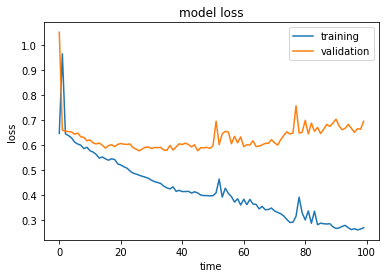

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


In [44]:
pred = model.predict(x_train)

In [45]:
model.evaluate(x_train, y_train)

637/637 [==============================] - 0s 266us/step


[0.36548895308136753, 0.8414442688928482]

In [46]:
model.evaluate(x_test, y_test)

160/160 [==============================] - 0s 268us/step


[0.6879933595657348, 0.7375]

accuracy =  0.8414442700156985
precision =  0.6483050847457628
recall =  0.8947368421052632
f1 =  0.751842751842752


Text(0.5, 15.0, 'Predicted label')

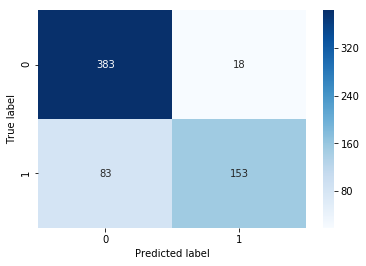

In [56]:
pred_train = model.predict_classes(x_train)

print('accuracy = ', accuracy_score(pred_train, y_train))
print('precision = ', precision_score(pred_train, y_train))
print('recall = ', recall_score(pred_train, y_train))
print('f1 = ', f1_score(pred_train, y_train))

cm = confusion_matrix(y_train,pred_train)
sns.heatmap(confusion_matrix(y_train,pred_train),annot=True,fmt='d',cmap="Blues") 
plt.ylabel('True label')
plt.xlabel('Predicted label')

accuracy =  0.7375
precision =  0.5
recall =  0.6666666666666666
f1 =  0.5714285714285715


Text(0.5, 15.0, 'Predicted label')

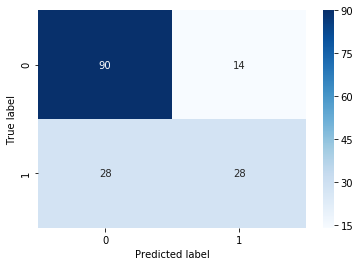

In [57]:
pred_test = model.predict_classes(x_test)

print('accuracy = ', accuracy_score(pred_test, y_test))
print('precision = ', precision_score(pred_test, y_test))
print('recall = ', recall_score(pred_test, y_test))
print('f1 = ', f1_score(pred_test, y_test))

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,fmt='d',cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [35]:
pred

array([[5.16006947e-01],
       [6.95372164e-01],
       [7.81312227e-01],
       [4.63808537e-01],
       [9.39311504e-01],
       [8.11411977e-01],
       [7.47636974e-01],
       [8.70776772e-01],
       [2.89079100e-01],
       [7.63012588e-01],
       [2.55690277e-01],
       [2.83659488e-01],
       [2.28722692e-01],
       [6.11033499e-01],
       [4.98001605e-01],
       [4.74759102e-01],
       [2.75257736e-01],
       [2.75551707e-01],
       [3.18643190e-02],
       [2.56923229e-01],
       [5.88080287e-01],
       [2.49685988e-01],
       [5.97051084e-01],
       [3.13033730e-01],
       [4.80736405e-01],
       [9.98849943e-02],
       [8.19913685e-01],
       [2.04536598e-02],
       [2.42299318e-01],
       [4.81787801e-01],
       [4.71176982e-01],
       [1.63554326e-02],
       [2.80246913e-01],
       [2.32496779e-04],
       [2.39681944e-01],
       [9.97641802e-01],
       [4.94616807e-01],
       [9.12933290e-01],
       [2.52166837e-01],
       [4.72560793e-01],
